# 1.基于 IDMb 数据集，使用 Keras 构建 GRU 神经网络模型，并对网络模型进行编译、训练和评估

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 32)           128000    
                                                                 
 dropout_4 (Dropout)         (None, 400, 32)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                18816     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 146,881
Trainable params: 146,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
313/313 - 10s - loss: 0.6931 - accura

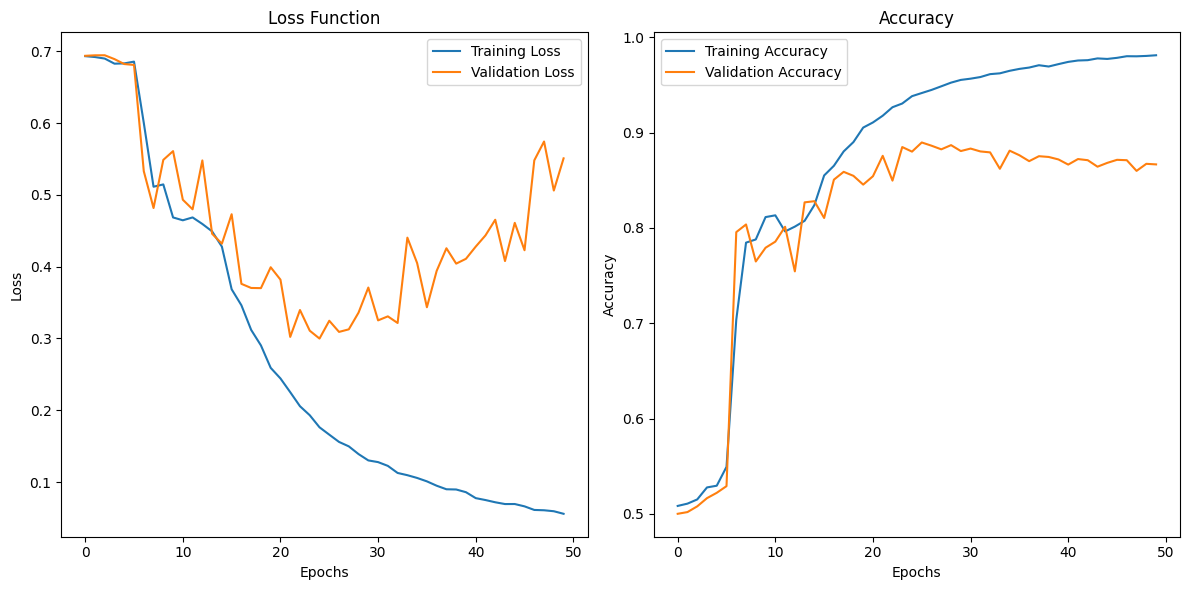

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, GRU, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# (1) 准备数据
# 导入 IMDb 数据集
vocab_size = 4000  # 词汇表大小
maxlen = 400       # 输入序列的最大长度

# 加载数据集（仅保留 vocab_size 个最常用的单词）
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# 对训练集和测试集的特征值进行序列填充
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

# (2) 构建 GRU 神经网络模型
model = Sequential()
# 嵌入层
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen))
# Dropout 层
model.add(Dropout(0.3))
# GRU 层
model.add(GRU(64))
# Dropout 层
model.add(Dropout(0.3))
# 输出层
model.add(Dense(1, activation='sigmoid'))

# 显示模型的参数信息
model.summary()

# (3) 编译、训练和评估 GRU 神经网络模型
# 编译模型
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    verbose=2
)

# 评估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=64, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# (4) 绘制损失和准确率图
# 获取历史数据
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 创建子图
plt.figure(figsize=(12, 6))

# 子图 1：损失函数值折线图
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 子图 2：准确率折线图
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()


# 2.LSTM 神经网络

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           128000    
                                                                 
 dropout_2 (Dropout)         (None, 400, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 152,897
Trainable params: 152,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
313/313 - 10s - loss: 0.6931 - accura

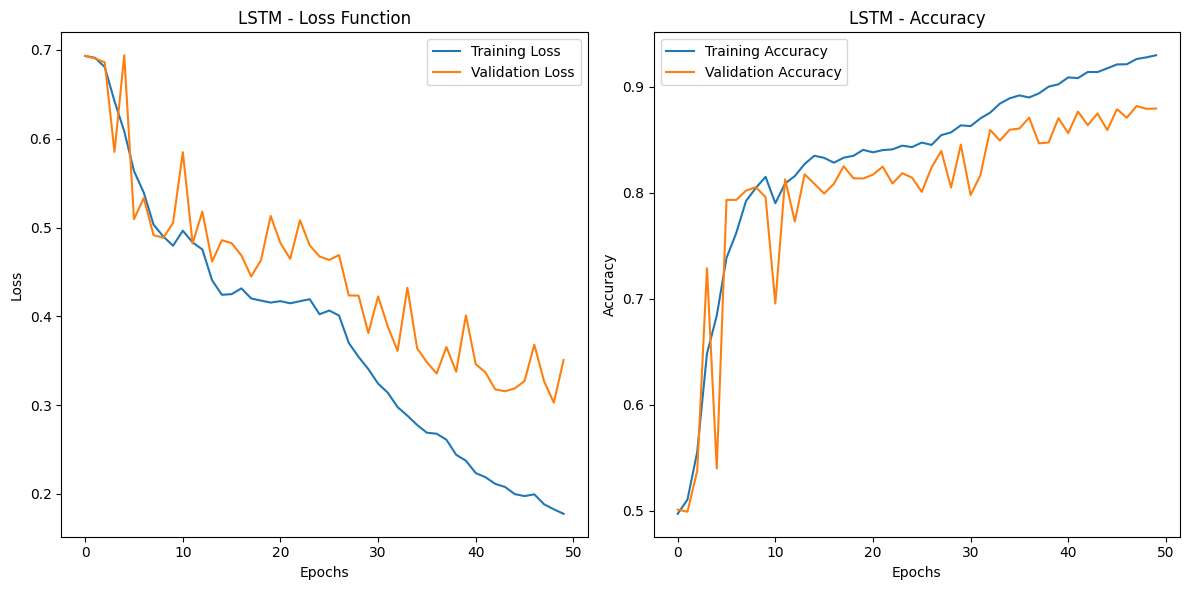

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

# (1) 准备数据
# 导入 IMDb 数据集
vocab_size = 4000  # 词汇表大小
maxlen = 400       # 输入序列的最大长度

# 加载数据集（仅保留 vocab_size 个最常用的单词）
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# 对训练集和测试集的特征值进行序列填充
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

# (2) 构建 LSTM 神经网络模型
model = Sequential()
# 嵌入层
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen))
# Dropout 层
model.add(Dropout(0.3))
# LSTM 层
model.add(LSTM(64))
# Dropout 层
model.add(Dropout(0.3))
# 输出层
model.add(Dense(1, activation='sigmoid'))

# 显示模型的参数信息
model.summary()

# (3) 编译、训练和评估 LSTM 神经网络模型
# 编译模型
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    verbose=2
)

# 评估模型
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=64, verbose=2)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# (4) 绘制损失和准确率图
# 获取历史数据
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 创建子图
plt.figure(figsize=(12, 6))

# 子图 1：损失函数值折线图
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('LSTM - Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 子图 2：准确率折线图
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('LSTM - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()
